<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/04_%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means 군집

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans # sklearn.cluster 패키지
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print('target name:', iris.target_names)

irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

target name: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
# K-Means 군집에서는 클러스터의 개수를 미리 알고 있는 것이 좋다.
# iris 데이터 프레임에서는 꽃의 종류가 세 종류니까 군집도 세 종류로 해볼까?

n_clusters = 3

# centroid는 처음에 무작위로 생성
kmeans = KMeans( n_clusters=n_clusters, max_iter=300, random_state=0 )
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

## KMeans 군집의 속성(Property) 확인
훈련이 끝난 KMeans 군집 객체에서는 클러스터를 확인 할 수 있다.
- `labels_` : 훈련된(`fit`) 데이터에 대한 군집 레이블을 확인
 - 지도학습에서 사용하는 `label`과는 다릅니다~!
 - 랜덤하게 `label`이 부여된다. 따라서 사람이 해석

In [3]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [4]:
# predict를 사용 가능. 어떤 데이터 포인트가 들어 왔을 때 이 데이터 포인트가 어떤 군집인지 확인
kmeans.predict(irisDF)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [5]:
# 무작위로 꽃을 만들어서 어떤 클러스터에 속할까? 를 확인
test_iris = np.array([[6.1, 2.5, 3.4, 1.2],
                      [3.8, 4.0, 3.1,	3.3]])

# predict : 언떤 클러스터에 속할지를 확인
kmeans.predict(test_iris)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 0], dtype=int32)

In [6]:
# kmeans에는 fit_predict가 있다.
kmeans.fit_predict(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## 각 데이터 포인트의 군집상의 좌표

In [7]:
kmeans.transform(irisDF)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

## 실제 타겟과 군집의 차이를 비교

In [8]:
iris.target, kmeans.labels_

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2

In [9]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [10]:
# 타겟과 클러스터의 개수를 각각 확인
irisDF.groupby(["target", "cluster"]).count()

sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  48           48            48           48
       2                   2            2             2            2
2      0                  14           14            14           14
       2                  36           36            36           36

In [11]:
# 데이터를 PCA를 통해서 차원 축소를 수행 한 후 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['c1'] = pca_transformed[:, 0]
irisDF['c2'] = pca_transformed[:, 1]

irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,c1,c2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


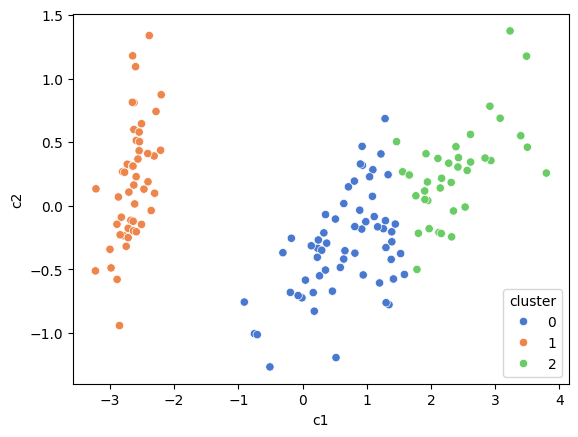

In [12]:
import seaborn as sns

# 각 컴포넌트 별 군집 확인
sns.scatterplot(
    x='c1',
    y='c2',
    hue='cluster',
    palette='muted',
    data=irisDF
)

plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [14]:
import pandas as pd

clusterDF = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)
clusterDF['target'] = y
clusterDF.head()

,x1,x2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


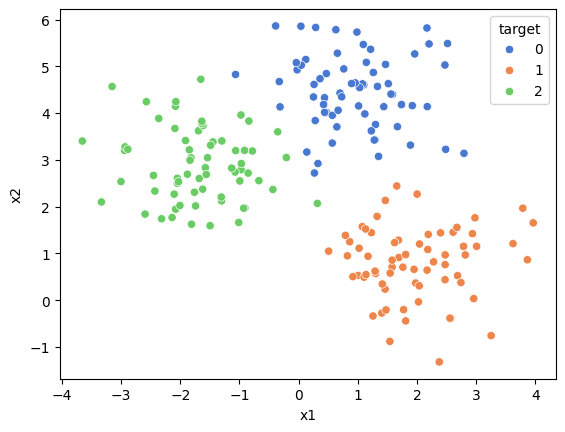

In [15]:
sns.scatterplot(
    x='x1',
    y='x2',
    hue='target',
    palette='muted',
    data=clusterDF
)

plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0,
       2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0,
       2, 0], dtype=int32)

In [17]:
clusterDF['cluster'] = cluster_labels
clusterDF.head()

,x1,x2,target,cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,2


# MeanShift 군집

<ipython-input-18-29a10e721fb8>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: ylabel='Density'>

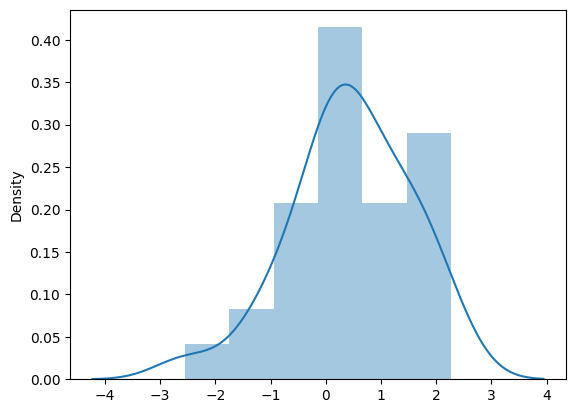

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.normal(0, 1, size=30) # 30개의 랜덤 데이터를 정규분포로 생성

sns.distplot(x)

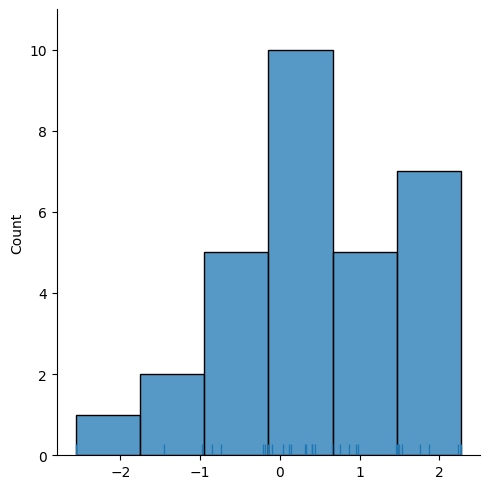

In [20]:
# rug 옵션을 이용해서 데이터의 밀집 상황 확인
sns.displot(x, rug=True)

## 각각의 데이터 포인트마다 커널함수 적용

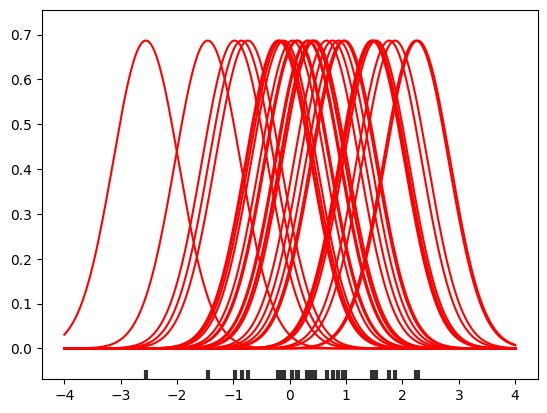

In [21]:
from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200) # -4부터 4까지 200개의 데이터를 집어넣어 지지도(support) 만들기

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);